# 第6章: 英語テキストの処理
Stanford Core NLPを用いた英語のテキスト処理を通じて，自然言語処理の様々な基盤技術を概観します．

- [Stanford Core NLP](http://nlp.stanford.edu/software/corenlp.shtml), ステミング, 品詞タグ付け, 固有表現抽出, 共参照解析, 係り受け解析, 句構造解析, S式

# 第6章: 英語テキストの処理
英語のテキスト（[nlp.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt)）に対して，以下の処理を実行せよ．

In [1]:
!curl -O http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8594  100  8594    0     0  41516      0 --:--:-- --:--:-- --:--:-- 41718


In [2]:
!head nlp.txt

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would b

## 50. 文区切り
(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

In [4]:
import re
with open('nlp.txt') as f:
    nlp_txt = f.read()

sentences = re.split(r'(?<=[.;:?!])\s+(?=[A-Z])', nlp_txt)
sentences[:10]

['Natural language processing\nFrom Wikipedia, the free encyclopedia\n\nNatural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.',
 'As such, NLP is related to the area of humani-computer interaction.',
 'Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.',
 'History\n\nThe history of NLP generally starts in the 1950s, although work can be found from earlier periods.',
 'In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.',
 'The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.',
 'The authors claimed that within three or five years

In [6]:
# 設問通りの区切り方だと文中に改行が入ってしまう。ひとまず文中の改行は\nとして出力する。
for sentence in sentences:
    print(repr(sentence))

'Natural language processing\nFrom Wikipedia, the free encyclopedia\n\nNatural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.'
'As such, NLP is related to the area of humani-computer interaction.'
'Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.'
'History\n\nThe history of NLP generally starts in the 1950s, although work can be found from earlier periods.'
'In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.'
'The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.'
'The authors claimed that within three or five years, machine tra

## 51. 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [32]:
words_per_sentences = [sentence.split() for sentence in sentences]

# 52で記号が邪魔だったので消しておく
words_per_sentences = [[re.sub(r'[^A-Za-z0-9\-]', '', word) for word in sentence] for sentence in words_per_sentences]

for sentence in words_per_sentences:
    for word in sentence:
        print(word)
    print()

Natural
language
processing
From
Wikipedia
the
free
encyclopedia
Natural
language
processing
NLP
is
a
field
of
computer
science
artificial
intelligence
and
linguistics
concerned
with
the
interactions
between
computers
and
human
natural
languages

As
such
NLP
is
related
to
the
area
of
humani-computer
interaction

Many
challenges
in
NLP
involve
natural
language
understanding
that
is
enabling
computers
to
derive
meaning
from
human
or
natural
language
input
and
others
involve
natural
language
generation

History
The
history
of
NLP
generally
starts
in
the
1950s
although
work
can
be
found
from
earlier
periods

In
1950
Alan
Turing
published
an
article
titled
Computing
Machinery
and
Intelligence
which
proposed
what
is
now
called
the
Turing
test
as
a
criterion
of
intelligence

The
Georgetown
experiment
in
1954
involved
fully
automatic
translation
of
more
than
sixty
Russian
sentences
into
English

The
authors
claimed
that
within
three
or
five
years
machine
translation
would
be
a
solved
problem



## 52. ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装として[stemming](https://pypi.python.org/pypi/stemming)モジュールを利用するとよい．

In [14]:
import stemming
dir(stemming)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [15]:
import stemming.porter

SyntaxError: invalid syntax (porter.py, line 176)

python 3非対応？！

ぐぐってみたところ下記の記事がヒットした。nltkを使ってみる。

https://www.haya-programming.com/entry/2018/03/25/203836

In [33]:
import nltk.stem.porter

In [34]:
ps = nltk.stem.porter.PorterStemmer()

In [35]:
ws_per_sentences = [[(word, ps.stem(word)) for word in sentence] for sentence in words_per_sentences]

for sentence in ws_per_sentences:
    for word, stem in sentence:
        print(word, stem, sep='\t')
    print()

Natural	natur
language	languag
processing	process
From	from
Wikipedia	wikipedia
the	the
free	free
encyclopedia	encyclopedia
Natural	natur
language	languag
processing	process
NLP	nlp
is	is
a	a
field	field
of	of
computer	comput
science	scienc
artificial	artifici
intelligence	intellig
and	and
linguistics	linguist
concerned	concern
with	with
the	the
interactions	interact
between	between
computers	comput
and	and
human	human
natural	natur
languages	languag

As	As
such	such
NLP	nlp
is	is
related	relat
to	to
the	the
area	area
of	of
humani-computer	humani-comput
interaction	interact

Many	mani
challenges	challeng
in	in
NLP	nlp
involve	involv
natural	natur
language	languag
understanding	understand
that	that
is	is
enabling	enabl
computers	comput
to	to
derive	deriv
meaning	mean
from	from
human	human
or	or
natural	natur
language	languag
input	input
and	and
others	other
involve	involv
natural	natur
language	languag
generation	gener

History	histori
The	the
history	histori
of	of
NLP	nlp
generally	gen

a	a
set	set
of	of
documents	document
or	or
sometimes	sometim
individual	individu
sentences	sentenc
that	that
have	have
been	been
hand-annotated	hand-annot
with	with
the	the
correct	correct
values	valu
to	to
be	be
learned	learn

Many	mani
different	differ
classes	class
of	of
machine	machin
learning	learn
algorithms	algorithm
have	have
been	been
applied	appli
to	to
NLP	nlp
tasks	task

These	these
algorithms	algorithm
take	take
as	as
input	input
a	a
large	larg
set	set
of	of
features	featur
that	that
are	are
generated	gener
from	from
the	the
input	input
data	data

Some	some
of	of
the	the
earliest-used	earliest-us
algorithms	algorithm
such	such
as	as
decision	decis
trees	tree
produced	produc
systems	system
of	of
hard	hard
if-then	if-then
rules	rule
similar	similar
to	to
the	the
systems	system
of	of
hand-written	hand-written
rules	rule
that	that
were	were
then	then
common	common

Increasingly	increasingli
however	howev
research	research
has	ha
focused	focus
on	on
statistical	statist
models	m

## 53. Tokenization
[Stanford Core NLP](http://nlp.stanford.edu/software/corenlp.shtml)を用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

In [36]:
!java -cp "stanford-corenlp-full-2018-10-05/*" edu.stanford.nlp.pipeline.StanfordCoreNLP -file nlp.txt

[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Searching for resource: StanfordCoreNLP.properties ... found.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [2.2 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.muc.7

メモリが足りないらしい。エラーメッセージでぐぐると下記がヒットした。最大1GBに設定している

https://stackoverflow.com/questions/8967544/using-stanford-corenlp

公式ドキュメンテーションによると2GBくらい必要とのこと。

https://stanfordnlp.github.io/CoreNLP/cmdline.html#notes

念のためjavaの引数を見てみる。

In [46]:
!java -h

使用方法: java [-options] class [args...]
           (クラスを実行する場合)
   または  java [-options] -jar jarfile [args...]
           (jarファイルを実行する場合)
optionsには次のものがあります。
    -d32	  使用可能な場合は32ビットのデータ・モデルを使用する
    -d64	  使用可能な場合は64ビットのデータ・モデルを使用する
    -server	  "server" VMを選択する場合
                  デフォルトVMはserverです,
                  これはサーバークラスのマシンで実行しているためです。


    -cp <ディレクトリおよびzip/jarファイルのクラス検索パス>
    -classpath <ディレクトリおよびzip/jarファイルのクラス検索パス>
                  クラス・ファイルを検索するディレクトリ、
                  JARアーカイブおよびZIPアーカイブの:で区切られたリストです。
    -D<name>=<value>
                  システム・プロパティを設定する
    -verbose:[class|gc|jni]
                  詳細な出力を行う
    -version      製品バージョンを出力して終了する
    -version:<value>
                  警告: この機能は非推奨であり、詳細のリリースで
                  廃止されます。
                  指定したバージョンを実行に必須にする
    -showversion  製品バージョンを出力して続行する
    -jre-restrict-search | -no-jre-restrict-search
                  警告: この機能は非推奨であり、詳細のリリースで
                  廃止されます。
                  ユーザーのプライベートJREをバージョン検索に含める/除外す

In [47]:
!java -X

    -Xmixed           混合モードの実行(デフォルト)
    -Xint             インタプリタ・モードの実行のみ
    -Xbootclasspath:<:で区切られたディレクトリおよびzip/jarファイル>
                      ブートストラップのクラスとリソースの検索パスを設定する
    -Xbootclasspath/a:<:で区切られたディレクトリおよびzip/jarファイル>
                      ブートストラップ・クラス・パスの最後に追加する
    -Xbootclasspath/p:<:で区切られたディレクトリおよびzip/jarファイル>
                      ブートストラップ・クラス・パスの前に付加する
    -Xdiag            追加の診断メッセージを表示する
    -Xnoclassgc       クラスのガベージ・コレクションを無効にする
    -Xincgc           増分ガベージ・コレクションを有効にする
    -Xloggc:<file>    タイムスタンプが付いたファイルにGCステータスのログを記録する
    -Xbatch           バックグラウンドのコンパイルを無効にする
    -Xms<size>        Javaの初期ヒープ・サイズを設定する
    -Xmx<size>        Javaの最大ヒープ・サイズを設定する
    -Xss<size>        Javaのスレッド・スタック・サイズを設定する
    -Xprof            CPUプロファイル・データを出力する
    -Xfuture          将来のデフォルトを見越して、最も厳密なチェックを有効にする
    -Xrs              Java/VMによるOSシグナルの使用を削減する(ドキュメントを参照)
    -Xcheck:jni       JNI関数に対する追加のチェックを実行する
    -Xshare:off       共有クラスのデータを使用しようとしない
    -Xshare:auto      可能であれば共有クラスのデータを使用す

In [50]:
# ヒープメモリを2GBにしてもエラーが消えなかったので、4GBでリトライ
!java -Xmx4g -cp "stanford-corenlp-full-2018-10-05/*" edu.stanford.nlp.pipeline.StanfordCoreNLP -file nlp.txt

[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Searching for resource: StanfordCoreNLP.properties ... found.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.4 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [2.3 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.muc.7

In [52]:
!head -20 nlp.txt.xml

In [53]:
import xml.etree.ElementTree as ETree

In [63]:
with open('nlp.txt.xml') as f:
    root = ETree.fromstring(f.read())

In [64]:
root

<Element 'root' at 0x1a18e674f8>

In [65]:
root.getchildren()

[<Element 'document' at 0x1a18e679f8>]

In [66]:
root.getchildren()[0].getchildren()

[<Element 'docId' at 0x1a18e675e8>,
 <Element 'sentences' at 0x1a18e67408>,
 <Element 'coreference' at 0x1a1a051868>]

In [79]:
word_nodes = root.findall('./document/sentences/sentence/tokens/token/word')
word_nodes[:5]

[<Element 'word' at 0x1a18e78cc8>,
 <Element 'word' at 0x1a18e787c8>,
 <Element 'word' at 0x1a18e78a48>,
 <Element 'word' at 0x1a18e780e8>,
 <Element 'word' at 0x1a18e78458>]

In [82]:
for word_node in word_nodes:
    print(word_node.text)

Natural
language
processing
From
Wikipedia
,
the
free
encyclopedia
Natural
language
processing
-LRB-
NLP
-RRB-
is
a
field
of
computer
science
,
artificial
intelligence
,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
-LRB-
natural
-RRB-
languages
.
As
such
,
NLP
is
related
to
the
area
of
humani-computer
interaction
.
Many
challenges
in
NLP
involve
natural
language
understanding
,
that
is
,
enabling
computers
to
derive
meaning
from
human
or
natural
language
input
,
and
others
involve
natural
language
generation
.
History
The
history
of
NLP
generally
starts
in
the
1950s
,
although
work
can
be
found
from
earlier
periods
.
In
1950
,
Alan
Turing
published
an
article
titled
``
Computing
Machinery
and
Intelligence
''
which
proposed
what
is
now
called
the
Turing
test
as
a
criterion
of
intelligence
.
The
Georgetown
experiment
in
1954
involved
fully
automatic
translation
of
more
than
sixty
Russian
sentences
into
English
.
The
authors
claimed
that
within
three
or
five

## 54. 品詞タグ付け
Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [83]:
tokens = root.findall('./document/sentences/sentence/tokens/token')

In [90]:
for token in tokens:
    print(
        token.find('word').text,
        token.find('lemma').text,
        token.find('POS').text,
        sep='\t'
    )

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
,	,	,
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ
language	language	NN
processing	processing	NN
-LRB-	-lrb-	-LRB-
NLP	nlp	NN
-RRB-	-rrb-	-RRB-
is	be	VBZ
a	a	DT
field	field	NN
of	of	IN
computer	computer	NN
science	science	NN
,	,	,
artificial	artificial	JJ
intelligence	intelligence	NN
,	,	,
and	and	CC
linguistics	linguistics	NNS
concerned	concern	VBN
with	with	IN
the	the	DT
interactions	interaction	NNS
between	between	IN
computers	computer	NNS
and	and	CC
human	human	JJ
-LRB-	-lrb-	-LRB-
natural	natural	JJ
-RRB-	-rrb-	-RRB-
languages	language	NNS
.	.	.
As	as	IN
such	such	JJ
,	,	,
NLP	nlp	NN
is	be	VBZ
related	relate	VBN
to	to	TO
the	the	DT
area	area	NN
of	of	IN
humani-computer	humani-computer	JJ
interaction	interaction	NN
.	.	.
Many	many	JJ
challenges	challenge	NNS
in	in	IN
NLP	nlp	NN
involve	involve	VBP
natural	natural	JJ
language	language	NN
understanding	unde

field	field	NN
of	of	IN
machine	machine	NN
translation	translation	NN
,	,	,
due	due	JJ
especially	especially	RB
to	to	TO
work	work	VB
at	at	IN
IBM	IBM	NNP
Research	Research	NNP
,	,	,
where	where	WRB
successively	successively	RB
more	more	RBR
complicated	complicated	JJ
statistical	statistical	JJ
models	model	NNS
were	be	VBD
developed	develop	VBN
.	.	.
These	these	DT
systems	system	NNS
were	be	VBD
able	able	JJ
to	to	TO
take	take	VB
advantage	advantage	NN
of	of	IN
existing	exist	VBG
multilingual	multilingual	JJ
textual	textual	JJ
corpora	corpora	NN
that	that	WDT
had	have	VBD
been	be	VBN
produced	produce	VBN
by	by	IN
the	the	DT
Parliament	Parliament	NNP
of	of	IN
Canada	Canada	NNP
and	and	CC
the	the	DT
European	European	NNP
Union	Union	NNP
as	as	IN
a	a	DT
result	result	NN
of	of	IN
laws	law	NNS
calling	call	VBG
for	for	IN
the	the	DT
translation	translation	NN
of	of	IN
all	all	DT
governmental	governmental	JJ
proceedings	proceedings	NNS
into	into	IN
all	all	DT
official	official	JJ
languages	la

## 55. 固有表現抽出
入力文中の人名をすべて抜き出せ．

人名の出力のされ方を調べるために、nlp.txtを眺めてみつけた"Joseph"のtokenの中身を見てみる。

In [124]:
token_joseph = list(filter(lambda x: x.find('word').text == 'Joseph', tokens))[0]
list(map(lambda child: (child.tag, child.text), token_joseph.getchildren()))

[('word', 'Joseph'),
 ('lemma', 'Joseph'),
 ('CharacterOffsetBegin', '1621'),
 ('CharacterOffsetEnd', '1627'),
 ('POS', 'NNP'),
 ('NER', 'PERSON'),
 ('Speaker', 'PER0')]

NERがPERSONになるようす。

In [135]:
tokens_person = list(filter(lambda token: token.find('NER').text == 'PERSON', tokens))
list(map(lambda t: t.find('word').text, tokens_person))

['Alan',
 'Turing',
 'Joseph',
 'Weizenbaum',
 'MARGIE',
 'Schank',
 'Wilensky',
 'Meehan',
 'Lehnert',
 'Carbonell',
 'Lehnert',
 'Racter',
 'Jabberwacky',
 'Moore']

## 56. 共参照解析
Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

In [136]:
!java -Xmx4g -cp "stanford-corenlp-full-2018-10-05/*" edu.stanford.nlp.pipeline.StanfordCoreNLP -file nlp.txt

[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Searching for resource: StanfordCoreNLP.properties ... found.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [2.2 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.muc.7

下記のcoreferenceを元に置換を進めればよさそう。
```xml
    </sentences>
    <coreference>
      <coreference>
        <mention representative="true">
          <sentence>37</sentence>
          <start>5</start>
          <end>8</end>
          <head>7</head>
          <text>machine learning algorithms</text>
        </mention>
        <mention>
          <sentence>38</sentence>
          <start>1</start>
          <end>3</end>
          <head>2</head>
          <text>These algorithms</text>
        </mention>
        <mention>
          <sentence>39</sentence>
          <start>3</start>
          <end>6</end>
          <head>5</head>
          <text>the earliest-used algorithms</text>
        </mention>
      </coreference>
```

In [142]:
corefs = root.findall('./document/coreference/coreference')
corefs

[<Element 'coreference' at 0x1a1a0518b8>,
 <Element 'coreference' at 0x1a1a051cc8>,
 <Element 'coreference' at 0x1a1a058138>,
 <Element 'coreference' at 0x1a1a058958>,
 <Element 'coreference' at 0x1a1a058d68>,
 <Element 'coreference' at 0x1a1a05c458>,
 <Element 'coreference' at 0x1a1a05c868>,
 <Element 'coreference' at 0x1a1a05ccc8>,
 <Element 'coreference' at 0x1a1a060138>,
 <Element 'coreference' at 0x1a1a060548>,
 <Element 'coreference' at 0x1a1a060958>,
 <Element 'coreference' at 0x1a1a060f48>,
 <Element 'coreference' at 0x1a1a069138>,
 <Element 'coreference' at 0x1a1a069548>]

In [162]:
def mention2dict(mention, rep_text):
    return {
        'start_sid': mention.find('sentence').text,
        'start_tid': mention.find('start').text,
        'end': mention.find('end').text,
        'text': mention.find('text').text,
        'rep_text': rep_text
    }

mention_dicts_per_coref = []
for coref in corefs:
    rep_text = None
    for mention in coref.findall('./mention'):
        if mention.get('representative') == 'true':
            rep_text = mention.find('text').text
        else:
            coref_dicts.append(mention2dict(mention, rep_text))
    mention_dicts_per_coref.append(coref_dicts)

import itertools
mention_dict = {(m['start_sid'], m['start_tid']): m for m in itertools.chain(*mention_dicts_per_coref)}

In [164]:
mention_dict

{('50', '21'): {'start_sid': '50',
  'start_tid': '21',
  'end': '22',
  'text': 'NLL',
  'rep_text': 'NLL'},
 ('10', '45'): {'start_sid': '10',
  'start_tid': '45',
  'end': '46',
  'text': '1966',
  'rep_text': '1966'},
 ('15', '21'): {'start_sid': '15',
  'start_tid': '21',
  'end': '22',
  'text': '1978',
  'rep_text': '1978'},
 ('25', '1'): {'start_sid': '25',
  'start_tid': '1',
  'end': '3',
  'text': 'These systems',
  'rep_text': 'many speech recognition systems'},
 ('26', '35'): {'start_sid': '26',
  'start_tid': '35',
  'end': '37',
  'text': 'these systems',
  'rep_text': 'many speech recognition systems'},
 ('47', '20'): {'start_sid': '47',
  'start_tid': '20',
  'end': '22',
  'text': 'the systems',
  'rep_text': 'many speech recognition systems'},
 ('38', '17'): {'start_sid': '38',
  'start_tid': '17',
  'end': '20',
  'text': 'the input data',
  'rep_text': 'the input data'},
 ('38', '1'): {'start_sid': '38',
  'start_tid': '1',
  'end': '3',
  'text': 'These algorithms

In [161]:
for sentence in root.findall('./document/sentences/sentence'):
    sentence_id = sentence.get('id')
    for token in sentence.find('tokens'):
        token_id = token.get('id')
        print(token.find('word').text, end=' ')
    print()

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages . 
As such , NLP is related to the area of humani-computer interaction . 
Many challenges in NLP involve natural language understanding , that is , enabling computers to derive meaning from human or natural language input , and others involve natural language generation . 
History The history of NLP generally starts in the 1950s , although work can be found from earlier periods . 
In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the Turing test as a criterion of intelligence . 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English . 
The authors claimed that within three o

In [167]:
for sentence in root.findall('./document/sentences/sentence'):
    end_token_id = None
    sentence_id = sentence.get('id')
    for token in sentence.find('tokens'):
        token_id = token.get('id')
        
        # end番目に達したので、状態をリセットする
        if token_id == end_token_id:
            end_token_id = None

        # 置換用の辞書にある場合、end - 1番目の単語までを先に出力してしまう
        mention = mention_dict.get((sentence_id, token_id))
        if mention is not None:
            print(mention['rep_text'] + ' (' + mention['text'] + ')', end=' ')
            end_token_id = mention['end']
            continue
        
        # 置換中 (end - 1番目まで) なので、出力せずcontinueする
        if end_token_id is not None:
            continue
        
        print(token.find('word').text, end=' ')
    print()

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages . 
As such , NLP (NLP) is related to the area of humani-computer interaction . 
Many challenges in NLP (NLP) involve natural language understanding , that is , enabling computers to derive meaning from human or natural language input , and others involve natural language generation . 
History The history of NLP (NLP) generally starts in the 1950s , although work can be found from earlier periods . 
In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the Turing test as a criterion of intelligence . 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English . 
The authors claimed t

## 57. 係り受け解析
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

collapsed-dependenciesの中身を見てみる。

```xml
        <dependencies type="collapsed-dependencies">
          <dep type="root">
            <governor idx="0">ROOT</governor>
            <dependent idx="18">field</dependent>
          </dep>
          <dep type="amod">
            <governor idx="3">processing</governor>
            <dependent idx="1">Natural</dependent>
          </dep>
          <dep type="compound">
            <governor idx="3">processing</governor>
            <dependent idx="2">language</dependent>
          </dep>
          <dep type="nsubj">
            <governor idx="18">field</governor>
            <dependent idx="3">processing</dependent>
          </dep>
          <dep type="case">
            <governor idx="5">Wikipedia</governor>
            <dependent idx="4">From</dependent>
          </dep>
          <dep type="nmod:from">
            <governor idx="3">processing</governor>
            <dependent idx="5">Wikipedia</dependent>
          </dep>
          <dep type="punct">
            <governor idx="5">Wikipedia</governor>
            <dependent idx="6">,</dependent>
          </dep>
          <dep type="det">
            <governor idx="12">processing</governor>
            <dependent idx="7">the</dependent>
          </dep>
          <dep type="amod">
            <governor idx="12">processing</governor>
            <dependent idx="8">free</dependent>
          </dep>
          <dep type="compound">
            <governor idx="12">processing</governor>
            <dependent idx="9">encyclopedia</dependent>
          </dep>
          <dep type="amod">
            <governor idx="12">processing</governor>
            <dependent idx="10">Natural</dependent>
          </dep>
          <dep type="compound">
            <governor idx="12">processing</governor>
            <dependent idx="11">language</dependent>
          </dep>
          <dep type="appos">
            <governor idx="5">Wikipedia</governor>
            <dependent idx="12">processing</dependent>
          </dep>
          <dep type="punct">
            <governor idx="14">NLP</governor>
            <dependent idx="13">-LRB-</dependent>
          </dep>
          <dep type="appos">
            <governor idx="12">processing</governor>
            <dependent idx="14">NLP</dependent>
          </dep>
          <dep type="punct">
            <governor idx="14">NLP</governor>
            <dependent idx="15">-RRB-</dependent>
          </dep>
          <dep type="cop">
            <governor idx="18">field</governor>
            <dependent idx="16">is</dependent>
          </dep>
          <dep type="det">
            <governor idx="18">field</governor>
            <dependent idx="17">a</dependent>
          </dep>
          <dep type="case">
            <governor idx="21">science</governor>
            <dependent idx="19">of</dependent>
          </dep>
          <dep type="compound">
            <governor idx="21">science</governor>
            <dependent idx="20">computer</dependent>
          </dep>
          <dep type="nmod:of">
            <governor idx="18">field</governor>
            <dependent idx="21">science</dependent>
          </dep>
          <dep type="punct">
            <governor idx="21">science</governor>
            <dependent idx="22">,</dependent>
          </dep>
          <dep type="amod">
            <governor idx="24">intelligence</governor>
            <dependent idx="23">artificial</dependent>
          </dep>
          <dep type="conj:and">
            <governor idx="21">science</governor>
            <dependent idx="24">intelligence</dependent>
          </dep>
          <dep type="punct">
            <governor idx="21">science</governor>
            <dependent idx="25">,</dependent>
          </dep>
          <dep type="cc">
            <governor idx="21">science</governor>
            <dependent idx="26">and</dependent>
          </dep>
          <dep type="conj:and">
            <governor idx="21">science</governor>
            <dependent idx="27">linguistics</dependent>
          </dep>
          <dep type="acl">
            <governor idx="27">linguistics</governor>
            <dependent idx="28">concerned</dependent>
          </dep>
          <dep type="case">
            <governor idx="31">interactions</governor>
            <dependent idx="29">with</dependent>
          </dep>
          <dep type="det">
            <governor idx="31">interactions</governor>
            <dependent idx="30">the</dependent>
          </dep>
          <dep type="nmod:with">
            <governor idx="28">concerned</governor>
            <dependent idx="31">interactions</dependent>
          </dep>
          <dep type="case">
            <governor idx="33">computers</governor>
            <dependent idx="32">between</dependent>
          </dep>
          <dep type="nmod:between">
            <governor idx="31">interactions</governor>
            <dependent idx="33">computers</dependent>
          </dep>
          <dep type="cc">
            <governor idx="33">computers</governor>
            <dependent idx="34">and</dependent>
          </dep>
          <dep type="amod">
            <governor idx="39">languages</governor>
            <dependent idx="35">human</dependent>
          </dep>
          <dep type="punct">
            <governor idx="37">natural</governor>
            <dependent idx="36">-LRB-</dependent>
          </dep>
          <dep type="dep">
            <governor idx="35">human</governor>
            <dependent idx="37">natural</dependent>
          </dep>
          <dep type="punct">
            <governor idx="37">natural</governor>
            <dependent idx="38">-RRB-</dependent>
          </dep>
          <dep type="conj:and">
            <governor idx="33">computers</governor>
            <dependent idx="39">languages</dependent>
          </dep>
          <dep type="punct">
            <governor idx="18">field</governor>
            <dependent idx="40">.</dependent>
          </dep>
        </dependencies>
```

In [188]:
import pydot
from IPython.display import SVG
def sentence2tree(sentence):
    dot = pydot.Dot()
    nodes = [pydot.Node(t.get('id'), label=t.find('word').text) for t in sentence.findall('./tokens/token')]
    edges = [
        pydot.Edge(dep.find('governor').get('idx'), dep.find('dependent').get('idx')) 
        for dep in sentence.findall("./dependencies[@type='collapsed-dependencies']/dep") 
        if dep.find('governor').get('idx') != "0"
    ]
    for node in nodes:
        dot.add_node(node)
    for edge in edges:
        dot.add_edge(edge)
    print(dot.to_string())
    return SVG(dot.create(format='svg'))

In [189]:
sentence2tree(root.find('./document/sentences/sentence'))

digraph G {
1 [label=Natural];
2 [label=language];
3 [label=processing];
4 [label=From];
5 [label=Wikipedia];
6 [label=,];
7 [label=the];
8 [label=free];
9 [label=encyclopedia];
10 [label=Natural];
11 [label=language];
12 [label=processing];
13 [label="-LRB-"];
14 [label=NLP];
15 [label="-RRB-"];
16 [label=is];
17 [label=a];
18 [label=field];
19 [label=of];
20 [label=computer];
21 [label=science];
22 [label=,];
23 [label=artificial];
24 [label=intelligence];
25 [label=,];
26 [label=and];
27 [label=linguistics];
28 [label=concerned];
29 [label=with];
30 [label=the];
31 [label=interactions];
32 [label=between];
33 [label=computers];
34 [label=and];
35 [label=human];
36 [label="-LRB-"];
37 [label=natural];
38 [label="-RRB-"];
39 [label=languages];
40 [label="."];
3 -> 1;
3 -> 2;
18 -> 3;
5 -> 4;
3 -> 5;
5 -> 6;
12 -> 7;
12 -> 8;
12 -> 9;
12 -> 10;
12 -> 11;
5 -> 12;
14 -> 13;
12 -> 14;
14 -> 15;
18 -> 16;
18 -> 17;
21 -> 19;
21 -> 20;
18 -> 21;
21 -> 22;
24 -> 23;
21 -> 24;
21 -> 25;
21 -

AssertionError: 1

In [195]:
# label="," がエスケープされていないのが問題に見える。
# double quotationで囲んでみる
import pydot
from IPython.display import SVG
def sentence2tree(sentence):
    dot = pydot.Dot()
    nodes = [pydot.Node(t.get('id'), label=('"' + t.find('word').text + '"')) for t in sentence.findall('./tokens/token')]
    edges = [
        pydot.Edge(dep.find('governor').get('idx'), dep.find('dependent').get('idx')) 
        for dep in sentence.findall("./dependencies[@type='collapsed-dependencies']/dep") 
        if dep.find('governor').get('idx') != "0"
    ]
    for node in nodes:
        dot.add_node(node)
    for edge in edges:
        dot.add_edge(edge)
    print(dot.to_string())
    print(' '.join(map(lambda w: w.text, sentence.findall('./tokens/token/word'))))
    return SVG(dot.create(format='svg'))

digraph G {
1 [label="Many"];
2 [label="challenges"];
3 [label="in"];
4 [label="NLP"];
5 [label="involve"];
6 [label="natural"];
7 [label="language"];
8 [label="understanding"];
9 [label=","];
10 [label="that"];
11 [label="is"];
12 [label=","];
13 [label="enabling"];
14 [label="computers"];
15 [label="to"];
16 [label="derive"];
17 [label="meaning"];
18 [label="from"];
19 [label="human"];
20 [label="or"];
21 [label="natural"];
22 [label="language"];
23 [label="input"];
24 [label=","];
25 [label="and"];
26 [label="others"];
27 [label="involve"];
28 [label="natural"];
29 [label="language"];
30 [label="generation"];
31 [label="."];
2 -> 1;
5 -> 2;
4 -> 3;
2 -> 4;
8 -> 6;
8 -> 7;
27 -> 8;
8 -> 9;
11 -> 10;
8 -> 11;
11 -> 12;
11 -> 13;
13 -> 14;
16 -> 15;
13 -> 16;
16 -> 17;
23 -> 18;
23 -> 19;
19 -> 20;
19 -> 21;
23 -> 22;
17 -> 23;
8 -> 24;
8 -> 25;
8 -> 26;
5 -> 27;
30 -> 28;
30 -> 29;
27 -> 30;
5 -> 31;
}

Many challenges in NLP involve natural language understanding , that is , enabling

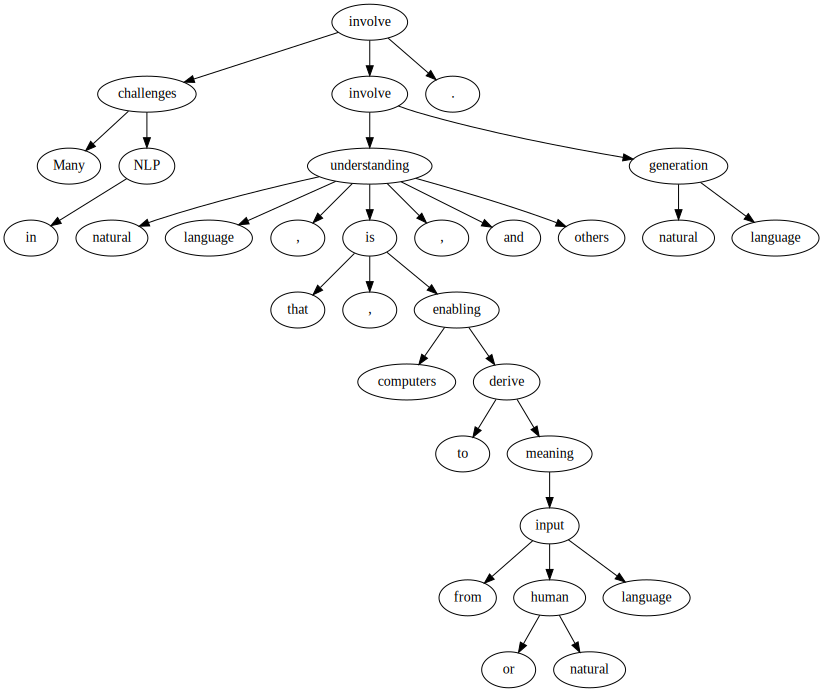

In [196]:
sentence2tree(root.find('./document/sentences/sentence[3]'))

## 58. タプルの抽出
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．

- 述語: nsubj関係とdobj関係の子（dependant）を持つ単語
- 主語: 述語からnsubj関係にある子（dependent）
- 目的語: 述語からdobj関係にある子（dependent）

In [240]:
def extract_svo(sentence):
    deps = sentence.find("./dependencies[@type='collapsed-dependencies']")
    nsubj_governors = [
        (d.find('governor').get('idx'), d.find('dependent').text)
        for d in deps.findall("./dep[@type='nsubj']")
    ]
    dobj_governors = [
        (d.find('governor').get('idx'), d.find('dependent').text)
        for d in deps.findall("./dep[@type='dobj']")
    ]
    
    pred_idxs = set(x[0] for x in nsubj_governors).intersection(x[0] for x in dobj_governors)
    if not pred_idxs:
        return None
    
    pred_idx = pred_idxs.pop()
    pred = sentence.find(f"./tokens/token[@id='{pred_idx}']").find('word').text
    
    subj = list(filter(lambda x: x[0] == pred_idx, nsubj_governors))[0][1]
    obj = list(filter(lambda x: x[0] == pred_idx, dobj_governors))[0][1]
    
    return subj, pred, obj

extract_svo(root.find('./document/sentences/sentence[3]'))

('understanding', 'involve', 'generation')

In [241]:
for sentence in root.findall("./document/sentences/sentence"):
    svo = extract_svo(sentence)
    if svo:
        print(*svo, sep='\t')

understanding	involve	generation
Turing	published	article
experiment	involved	translation
ELIZA	provided	interaction
patient	exceeded	base
which	structured	information
underpinnings	discouraged	sort
Some	produced	systems
which	make	decisions
that	contains	errors
implementations	involved	coding
algorithms	take	set
Some	produced	systems
which	make	decisions
models	have	advantage
Systems	have	advantages
procedures	make	use
that	make	decisions


## 59. S式の解析
Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．

In [247]:
!java -Xmx4g -cp "stanford-corenlp-full-2018-10-05/*" edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,parse -file nlp.txt

[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.5 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... done [1.3 sec].

Processing file /Users/masato/Desktop/nlp100/nlp.txt ... writing to /Users/masato/Desktop/nlp100/nlp.txt.xml
Annotating file /Users/masato/Desktop/nlp100/nlp.txt ... done [14.2 sec].

Annotation pipeline timing information:
TokenizerAnnotator: 0.1 sec.
WordsToSentencesAnnotator: 0.0 sec.
POSTaggerAnnotator: 0.2 sec.
Parse

In [248]:
with open('nlp.txt.xml') as f:
    root = ETree.fromstring(f.read())

In [252]:
parses = root.findall("./document/sentences/sentence/parse")
parses[:5]

[<Element 'parse' at 0x1a1699cb38>,
 <Element 'parse' at 0x1a16c4dc28>,
 <Element 'parse' at 0x1a16c75ef8>,
 <Element 'parse' at 0x1a16cc8b88>,
 <Element 'parse' at 0x1a16d08e58>]

In [336]:
parses[0].text

'(ROOT (S (PP (NP (JJ Natural) (NN language) (NN processing)) (IN From) (NP (NNP Wikipedia))) (, ,) (NP (NP (DT the) (JJ free) (NN encyclopedia) (JJ Natural) (NN language) (NN processing)) (PRN (-LRB- -LRB-) (NP (NN NLP)) (-RRB- -RRB-))) (VP (VBZ is) (NP (NP (NP (DT a) (NN field)) (PP (IN of) (NP (NN computer) (NN science)))) (, ,) (NP (JJ artificial) (NN intelligence)) (, ,) (CC and) (NP (NP (NNS linguistics)) (VP (VBN concerned) (PP (IN with) (NP (NP (DT the) (NNS interactions)) (PP (IN between) (NP (NP (NNS computers)) (CC and) (NP (JJ human) (-LRB- -LRB-) (JJ natural) (-RRB- -RRB-) (NNS languages)))))))))) (. .))) '

In [337]:
def parse_parse(parse):
    tree, _end = parse_parsetext(parse.text)
    return tree

def parse_parsetext(text, start=0) -> (tuple, int):
    #print(f'called: {text[start:]}')
    assert text[start] == '('
    tag = text[start + 1:text.index(' ', start + 1)]
    contents = []
    
    i = start + len(f'({tag} ')
    while i < len(text):
        if text[i] == '(':
            content, end = extract_pars(text, i)
            contents.append(content)
            i = end + 1
        elif text[i] == ')':
            end = i
            return ((tag, contents), end)
        elif text[i] == ' ':
            i += 1
        else:
            m = re.search(r'[\(\) ]', text[i:])
            contents.append(text[i:i + m.start()])
            #print(f'contents added: {contents[-1]}')
            i += m.start()

In [338]:
parse_parse(parses[0])

('ROOT',
 [('S',
   [('PP',
     [('NP',
       [('JJ', ['Natural']), ('NN', ['language']), ('NN', ['processing'])]),
      ('IN', ['From']),
      ('NP', [('NNP', ['Wikipedia'])])]),
    (',', [',']),
    ('NP',
     [('NP',
       [('DT', ['the']),
        ('JJ', ['free']),
        ('NN', ['encyclopedia']),
        ('JJ', ['Natural']),
        ('NN', ['language']),
        ('NN', ['processing'])]),
      ('PRN',
       [('-LRB-', ['-LRB-']),
        ('NP', [('NN', ['NLP'])]),
        ('-RRB-', ['-RRB-'])])]),
    ('VP',
     [('VBZ', ['is']),
      ('NP',
       [('NP',
         [('NP', [('DT', ['a']), ('NN', ['field'])]),
          ('PP',
           [('IN', ['of']),
            ('NP', [('NN', ['computer']), ('NN', ['science'])])])]),
        (',', [',']),
        ('NP', [('JJ', ['artificial']), ('NN', ['intelligence'])]),
        (',', [',']),
        ('CC', ['and']),
        ('NP',
         [('NP', [('NNS', ['linguistics'])]),
          ('VP',
           [('VBN', ['concerned']),
  

In [344]:
def rip_tree(tree):
    if isinstance(tree, str):
        return tree
    if isinstance(tree, tuple):
        _tag, contents = tree
        return ' '.join(map(rip_tree, contents))    

In [345]:
rip_tree(parse_parse(parses[0]))

'Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages .'

In [352]:
def display_np(tree):
    if isinstance(tree, tuple):
        tag, contents = tree
        if tag == 'NP':
            print(rip_tree(tree))
        for content in contents:
            display_np(content)
        

In [354]:
display_np(parse_parse(parses[0]))

Natural language processing
Wikipedia
the free encyclopedia Natural language processing -LRB- NLP -RRB-
the free encyclopedia Natural language processing
NLP
a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
a field of computer science
a field
computer science
artificial intelligence
linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
linguistics
the interactions between computers and human -LRB- natural -RRB- languages
the interactions
computers and human -LRB- natural -RRB- languages
computers
human -LRB- natural -RRB- languages


In [355]:
for parse in parses:
    display_np(parse_parse(parse))

Natural language processing
Wikipedia
the free encyclopedia Natural language processing -LRB- NLP -RRB-
the free encyclopedia Natural language processing
NLP
a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
a field of computer science
a field
computer science
artificial intelligence
linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
linguistics
the interactions between computers and human -LRB- natural -RRB- languages
the interactions
computers and human -LRB- natural -RRB- languages
computers
human -LRB- natural -RRB- languages
such
NLP
the area of humani-computer interaction
the area
humani-computer interaction
Many challenges in NLP
Many challenges
NLP
natural language understanding , that is ,
natural language understanding
computers
meaning
human or natural language input
others
natural language generation
History The h